In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
from common import method_aliases

In [88]:
EVAL_PATHS = ['../evals/autocovariance_denoising', 
              '../evals/augmentation_ensemble_denoising', 
              '../evals/representation_ensemble',
              '../evals/sta_lta']

EPOCHS = 21

In [89]:
def beautify(df):
    df.rename(mapper={"model":"Method", "training":"Training", "testing":"Testing", "auc":"ROC-AUC", "epoch":"Epoch"}, axis=1, inplace=True)
    df["Method"] = df["Method"].apply(lambda x: method_aliases(x))
    df["Epoch"] = df["Epoch"] +1
    return df

def repeat_epochs(df):
    dfs = []
    for i in range(EPOCHS):
        _df = df.copy()
        _df["Epoch"] = i
        dfs.append(_df)

    return pd.concat(dfs)

In [90]:
metric_dfs=[]
epochs = []
for eval_path in EVAL_PATHS:
    df = pd.read_csv(join(eval_path, 'metrics.csv'))
    df = beautify(df)
    if len(df["Epoch"].unique()) == 1:
        df = repeat_epochs(df)

    metric_dfs.append(df)

df = pd.concat(metric_dfs)
print(df)

         pre       rec  f1_score          Method  Epoch  split  Training  \
0   0.967525  0.963282  0.965398  Autocovariance      0      0  instance   
1   0.969681  0.959506  0.964566  Autocovariance      0      1  instance   
2   0.964137  0.959158  0.961641  Autocovariance      0      2  instance   
3   0.961781  0.962742  0.962261  Autocovariance      0      3  instance   
4   0.967829  0.952829  0.960270  Autocovariance      0      4  instance   
..       ...       ...       ...             ...    ...    ...       ...   
15  0.953722  0.975132  0.964308         STA-LTA     20      0     stead   
16  0.956698  0.973365  0.964960         STA-LTA     20      1     stead   
17  0.956874  0.970095  0.963439         STA-LTA     20      2     stead   
18  0.957523  0.971408  0.964415         STA-LTA     20      3     stead   
19  0.954826  0.972859  0.963758         STA-LTA     20      4     stead   

     Testing   ROC-AUC    av_pre  
0   instance  0.970842  0.994360  
1   instance  0.9

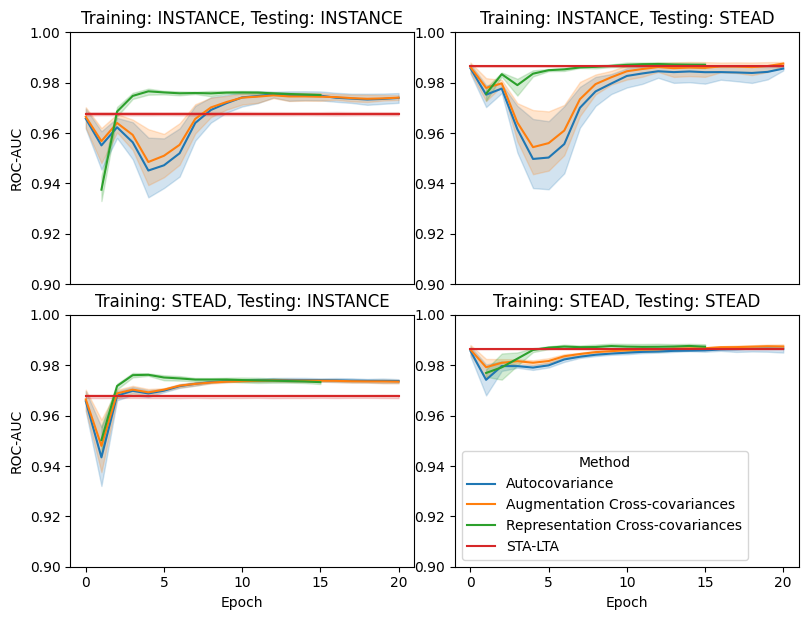

In [91]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
for train_idx, training_set in enumerate(["instance", "stead"]):
    for test_idx, test_set in enumerate(["instance", "stead"]):
        _df = df[(df["Training"] == training_set) & (df["Testing"] == test_set)]
        if train_idx == 1 and test_idx == 1:
            sns.lineplot(data=_df, x='Epoch', y='ROC-AUC', hue='Method', ax=axs[train_idx, test_idx])
        else:
            sns.lineplot(data=_df, x='Epoch', y='ROC-AUC', hue='Method', ax=axs[train_idx, test_idx], legend=False)
            
        axs[train_idx, test_idx].set_ylim(0.90, 1.)
        axs[train_idx, test_idx].set_title(f"Training: {training_set.upper()}, Testing: {test_set.upper()}")

        if train_idx == 0:
            axs[train_idx, test_idx].get_xaxis().set_visible(False)

        if test_idx == 1:
            axs[train_idx, test_idx].set_ylabel("")

plt.tight_layout(pad=0)
plt.savefig('../evals/cross_domain.pdf', dpi=600)